In [2]:
# importing necessary packages
import numpy as np
# import argparse
import cv2
# import easydict

In [3]:
# !pip install easydict

In [4]:
# construct the argument parse and parse the 
# import argparse
# ap = argparse.ArgumentParser()

# ap.add_argument("-i", "--image", required=True, help="patho to input image")
# ap.add_argument("-p", "--prototxt", required=True, help="path to Caffee 'deploy' prototxt file")
# ap.add_argument("-m", "--model", required=True, help="path to Caffe pre-trained model")
# ap.add_argument("-c", "--confidence", type=float, default=0.5, help="minimum probability to filter weak detections")

# args = vars(ap.parse_args())


# args = easydict.EasyDict({
#         "image": 'test_image.jpg',
#         "prototxt": 'deploy.prototxt.txt',
#         "model": 'frozen_east_text_detection.pb',
#         "confidence": 0.5,
# })

In [5]:
# load model from disk
print("[INFO] loading from model...")
net = cv2.dnn.readNet('frozen_east_text_detection.pb')

[INFO] loading from model...


In [6]:
import matplotlib.pyplot as plt
import urllib

In [7]:
trl='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAUUAAACbCAMAAADC6XmEAAAAllBMVEX///8AAAD5+fn8/Pz29vbz8/Pw8PDq6urt7e3e3t7m5ubk5OTZ2dlBPj/i4eJqaGlwbm+9vLxJRkd4dne3treBf4BiYGHU09TJyMmFg4R0cnPEw8StrK3Pz8+fnp5nZWaOjI1MSUo6NziVk5SmpaVYVVZbWVoqJic0MDE2MzSpqKgnIyQgGx2qqKkiHh8QBwoaFRcNAAT5t/bfAAAgAElEQVR4nO29CXvjNg8uCmqXTO3UZi2mrMVOYsfO//9zF6DsxFmcmbbTnu+cGzxtJtFCgq9AkABBEOCHfuiH/h8ivdXAdqFwAFpTK0sO9CdwE+yyLA0odADXwwfxIhRlW7YaPlXa4NCP/5YCrJBbxBt4LmgFMuUA8q+1F244MlrjP2VZgFEQwwa9hv+XyHmhmmTBin78WXJONnQhNBO0iW4zuR2hSQH6Ah4TKW2YJUDY4YMJB72TrJKmy2TVQvNU7YY/zMwvSI4AUQxDqEOXgfcMsG4gG6BbQ7yt9hxmZJQBzKHswHmoFdNgJ4hZFT3jtW4vqwCqPmP1n+XM2hXWsEZ+xl0A9hZaRHRtWROHR2ngRw93FaTIfbmP6HHkEVzfRL5ECNq+/bPM/IKGI0BaQ3fI4bECe29akQA4id6AWELVwWawbORwU5saWD5Chc2AwSchcGf80YXUJHkE/mT+Uc6sXR76KHzOGeuyWbgtQezDcMeh2YYZQF5XGaEYej71aaZhDzmFoQdig02K/ygvv6LhEWWxhqE7zp1EZqNwhyi2rASI93nvQeiHIaE45QKspN2WMwfDDybs13zCAsZduF5E+uT8Uc6sJw9GLBo2KFf23kIpaxC8GXu06q95CRV7hPacbytYUHQTuoGy6O6DP8rLr6hLwfE5oggjQxT3+BkFyQFqxDi1EKq8Ax1RzEklWj43pxNH5PJdc0Gxo4aSLMa+8Uc5s/Y2HFEWISQUfbokKsVIk6RrDhv80CiLa+HYyQrgTLJ4SFEfiYeoH/8oK78k099MEghFGKRiNkMUnQdCkT4xhKPSOWGeprqFOtHJOTy7doFPcurR4zaN8Cv0UVL8Wc50VweLBlsPv46mZMvEP1eoWDjnhroMHgQ4VHvWMlLreMMG0+V/Vrf8Bhkt6jlwaIRdgY7M2ubSAsXzwiE+4XHu4m384JqhEcfIvYYiAJZLTXI41/9rzn/oh37oh37oh37oh37o/+dk2J9nz7r3R+aluvehaOcrZ9rq9+uyHfj0sPOHJv+m+7Hgr5g1vjbA61SG00fWitPHIpF0TUebBQx62Pgt1usX8Z6FJPv8kPnbbiptXaWb5uNVX37xqK5pLrZXWcvGb9nM2oa9v/Als2g+flWa/YyV7d9hZqK91GpfFLD1mVFnW3x4TM6f3TnG53f626fInfaRMQ3fqX9XmFI0oMn5+UY6NqldffFotfWfbZH5+NWHh6fy8wOf/bT1y4f7Iv34CF70vrTAW4aXOTKyiKN+8Wp+7jjklGpLsMtnDnEMw6cqtOTVw/MKJ6F4LSleL+6iW9In++u6viI9IZfDO1mU4lKbDu/LCduWXNu+B00J1WehGj9fKm9R/IpZdfEOTS8joqal3YYDD7s9r86pkA8r6KIs1etztTlc4I9q8gWsnuknpAtkejaEbemnfGqq83qAdAh58JBHZ0GOLMlikENOXlLwEr9yxZTtEIpOpgsYwyntYsbLfZafH6MnibeqSHxm8tIKFlLdIpMS9EpOQ3HKZbsfwO2HqdBzXxWuqC+VF8KntQ4t9ZaLbSQza53Ex1xsk2pVRliOfJYJdlI3H6ZnKNJhB1dmA2I2u2GWLhZTbqS7YRuO0/MKvKjbLHrS6HYHAUPkDYnTlyBLe2dDsbULpsNGwk5AdfkE681hQM4IxWAOlw/f5Ksjg2NeDGBtOXRrD/lIK2ieQeQASez14CywdBE+HmqcQdm7NVPd2NkHoDNuJEfIZr1g0PrB5dZXVM4s0ux927J2XANPYcKi+wH6Bsqt1fga3126d745dBcUg+kqU6zk+0bf18MKhgwMVhTPdcBsJ6lh20J8Iq9zBx+YbX1eMuf1YjdDfdKDQwnhAGFnL4Vjd3Aks/pBNDHfU1+2nxxY+XY34Stb2JfQ9ddWtIisQtHm/cLanIoGv1SOj5ioMPtKNAi7hOJMLlPq0ZEfa2+MEfNWN+NLSklbe2zmS6EjGnFOvkGZ460vdDJceK3PQ500orF85dskFKfBOXAIzrxOwPZfNXx9MBcU7aKXC/dP+CJHEHA0QxTrnRDNymEa1s63JunF8im7jMvjG7PTK0d0UcxYDpi7AmXU8jvRqEWTQa0DlBMJLT+sLigGC4rjBxQBGx0sPbpcRrR8WcDKUH4tQlHJPqLYnklGoBegxy/jLYrmyeqia3nOBUV8rl5QDO/JIfYa6q5yrpWrPeluUDwXn1E0/eDSo0nKiIqF5WIvFxTVn7ZCsXiy1OgSRCf93SdHZt84UtAiis8KxVFaD9ehRk4aWMwYX2q3cpJ10cXO2QJva3NmkDi9ocgb3cMGeGcXUAHGk7oomAgi6Mpjj3K1guZcYz8jWXyB8VCYO+FmEC+gjRvFmMYszsYgU+3TzqheGSeZXVAs2Ghnd1ZoDdbSeqTBhhVW+ByXG6CPPw0wjdijNUTR2S7qumhQxyOvvgNhA81mKeCQBqLRUvuhBZmCfqpWj7WF3Qu/xYuEjsHGhpel8uN8ZdZ96VYXxToii2IiCTGeOKII6Za3ku7U3XpDOnv0Q9SWG78DrepFFx2hDNcdtKG001BBXvrJYACPojUvp7y6KK8myd16Ux43Hci+g86PPB6hdgxR1/pVlrlpdeHBm/I2jdoxHKGepsvkY+iHOOzqKPXSqGg2j1D30xfzEkX6IENSE8Xc09jlhx4+nZXR2rLSNLU15LMJl75R+n2nQRlFaVBPG3mZ4tmh32mRbNPQDabQW82ojrtQtFGqF9Pc9WWXVo+XR+cvmF0u1kMYi1C62Eq92lbX6aP28edFL+kf9NPN3ze/3jykvf/zWuR1AqK/zUTefv2kA/Xv5j3a63zsPavwcSp8W9cHDm8e0N+9oN0++yWzn3m7p8J/6Id+6Id+6If+MRmZ9/miUHMDveLLn8fuD1RUDjo41bQ4eczx74RVNI9fXtaOanqjXdkV1Z8NH0F21w4ZhNlrucUH1Bz/C09i90CmoDFfHH/V5g9wIjYaJMHlgxjrTy6h36Ch+vIyTnBVmf1lWjdu/3TQhofm/lGu1q8e2vaZ//ot7r/jQ7yi+M+EMmCvpXR/B8V7FPfv/uS3oUzlbzT3d0ifXn3J8QrNy/eyZwvDFrxRj7Qidum/mif1yMGO0RoSYwsiKkdlWTVMtFB0i6OobQtRCD0QK0O08aWzlaNtCWELYTYxmI81xIJzQULSxlp3Fvg19dxvzK6qH/H3oLu4cZsGtLqoH7+TIqNsoYx5d3HbaFh0LFqOPye6aAvsZaIrgSfteDVw24NEPsbualTawnkM4hLq2PCa4PHNiVw/GisRc+Q9FoaON1pRe41YZtWrR619qi7BmvFhqE2/bchTVXdLRYI59UslnghGe9+QJ2xt8d3YMb1kBeQiOLli31R7VRWLedwbHcmmuXmWCRrbXiK8/Sx6pZvSBnt/mEIagizbvGRWeVhBiG3Qo8nszjG5MrNeGJ0vohncSVfeXmsuH2IvSZo5+QZGLxm06CCqa4etmdHuXH3W4x1e1GI0s9PGZIX71I3s4ssu9kPp+aV3uohkzMK+SWcY93bM5NJs+kC52EjoM0hT6GK3L8+FzUqoLrePzGx3VxTrfVeaWynOAroBfPUhzJ0NfguRpD+GCPbSHKDAPnEuIClcRm5yEYJDCwtg4J9JAzojeY5ztLuYQTGEaHA3yjuRomVLnqNqCxl5xHccpthQeqCcyV0Gy4vUo/lWk9OQ5oSPpKjnagDjufYorOtr6pQTxDlc1dOuXp3KQoDo6aLut9y3wNGpR7OLMGrYtgFZSy8+Rv2F6+SXcX0b2IoYV+RIchyKXpd7qIz2ERJB7MhLRQ6ztO21R1vYm81tAJXUknRYnFrWztb9EqSqJTiX6XwsEUWLLia8flbyGip3GS00Ier4SdR6kyBXzYJi1MHirzJlhiy/xNVUI39i2HN4zIXSIfWsv6KoKxR9I+p0tRYGBXkykG2YGjlPX4x3ioaBXCrLB1WopmMW4tBPKD47ml/UCfVA0urnGxQj7DrDRbVrDPvF4wVFF9JrZPpq2ORgPtRyHyPj9fAgoHhqr6sTNrOM7bX3UyAq+VJH6WwLbeHf3Dkki1INf/rmDMmkKz7wYsIDrNRekSzurAVFSCjSkrSkcngxDdY3KG4L3tM6QDG8rMjZveVgnRfHWP0qi2KRRdfXhhBojwCs9pAtKO6/Gww6haL1fF15sl9S+4SMx+qi7hcFdlyLu0tPekWRPHtXWdTIbT3OEPgOtSK9yKL5bDfIVbVvh5cA6iegGdnTfJ3OOMx8k0Wa1Rg+oaj7CHNLMKKqc1lnTpNSNlgU4dmd2uKlW507WLPNZGQPqEToUxisq8t9WZEu0zP8JpBshtPa8SOjOpPS7zebc4N91Sj25Byt2Ma8clrteceUaqn3Iw8T4/GlNFmfS7wSvFT+diUnnslvQDTy3KqerYUVRX0DOBvTlovIMaQsTJzx1Hqsu7hf5nVjJ119XUloGbnWWJeeRMGEmWwW7WGe0glHBL6HttfxIXnADjHO13piVren7OK/0fqsKV8enXBGVZwvq5x24FlBYAaBKk7DkRlFPggcO1g5AYpcW+vgBqYXqO8SCBMcobDQXdp+osWcFwa+7QYkIVapt7S4CTrJQmlRCc0iXm7geMHSlrLUXNdY4ftavMgMd60CqnX8baCw5hKf5rUUek0DVKK6uujZVFkRE/e2E1xDBYwYr9bi6tKyA1IXrjBLG1uOXF+gcQsdZY220FDjCs+h316XG1Xp7msZMb67QObFX9gs/wLp8PVU+Quq/uPtM9+TDsN/HnF9j7TN5ncjH8wp/2p9/v8UVfN/HPv/HfHfth3Mtv1vusfvUfDf7oj6oR/6o2R5YPzZ/rQsaTqfVZ39FrvmamAbtC+2+JurQIZ7rei/pMUqsD41zesraHZ/0i3nqLmhm3wcoetIys1l4iHYSk8GivV5+nt7RK3NBCX7097EX5GrDGD3i4i/KgPnq3HA+qssXl/Ql9i94UPcVUfb4Ph2EXsdLVluU4Tb6m9OKsoejK9GgTuxmv+MnMuE8RKW2MlPT8ivIh6Rpr/qnovev6BQfFvFdRcvQbvYcIQiUvb354lt//X19A/vf1bUv49IHOXbn+Mh2z25ZPfNaLBLiWZyuWGtlj7LUwYD66+GT74T2aGO9yVP0QRzU7m/yo85ZX0Lc693OzTy+g2Ew7Yd0cIuZ3mosNt166vl2+wuv9nygF2Zee1z6R62kSWmdarXO7n9bo7ONy8xRA8Ri3TxlG5RZyCK2VmDJs0rQL5qqM7Dc64J1q/vSvdm11Sn+Ljnq/SlATeUyf1patBXk2tMM1T+qmNTpa+7p9Xw4kE8y5MEe9OFqu9RvFW2J1kUGwpE4YPLaMdneQJv78LLq3/FY5p9torG2hr4ZNq8Tu31aQT+bMZbw0DT/8FF1QdtC0xf7S2SxWjw8vxSyNU3qCWt61vkm5pKslk47SStoK+Kb2xAg0ETQbwHZzuQH7RjhGLA9NoHO+VbDfmyGejnAvx7USpI7t7WmRGMwKBMaM/1eBdFrRdQbo04Adodjgr4WIHwTObwxKAePY/eVnVi2l2MVS8o5spydHg0QHsA0+fA3rxUWxEf4s4BJ0g3eHt9HdIpCMnZt7GvUNxzMB5oBYQpl+OQac+iLa+6qzlfZNEMhq1zQRF79LAHePQhiUGvNvM9z5jFq1Q5j4aEorB0xouemE/V8oPppgpFCl76DkWYm3jbNC6+IHsozut71QGszhTS58ZLMBozwdvNBZjMoo3W5BnDpvFbFCuF4kCh0pnoLii6tyg2uWxmcvgM4wY0L92ZVxTLBUWN3FAov7ozPKMswtGnBSftqX3TJu4SCS+8uKpfZZFQ3GH5C4rufS9t9ijWCsVxJhQBFcKCYkQhNEM3/h6Kwq/qnBrSxT3oXvpwd4pHKLoHFx+z/YBkEZt2LiiocaNQJD+eUni0Vx+RxTFa5PD4UrYD9q5NZbVnFRzLild1ar2MGhNg74ohDyQCfF3LCDsodmZ7sLxdC7sC6gYq7C+6i0+vU1IpS3ga0fCMXbY88D6Ot6XOAoWiRHRNCvNLvs2ggD26Ci3svvocw76Gegst9jVa2hC8KnbukPMrit8VZO06QNaABWNvDw5Md7WINh0h7rX6AAUChtw2MeTCYE6JkpNWEE523S0ozvint8l5ONcwvEwrPepFUsi+FFNFqSteJ8SZDeRwHXaN345R9roeaEYRxeZVO4miOj5UPM8yo+kHXZxy6XM9ZTeqvp76aU3hv6I/xr0sp7SY5xLKKUJdPG2+9UdkPjJWvkQhKh5/StemmU6l7BsQZ7+AYSu25dA3WKQp9t+tSQ8cUov2TIi+FlH6zcKmHa43OKuP9tXU4fMdyrDUur6Dx0Ne9Y61Zpm+fJh/Y2r1L9LiVFc9+n+HnMN95fo/SfFWff3df5s+5Rck1sP/VcKoD6laCF5X/3VmqR/6oR/6/xnFXwz3VnPXTVDI904HV9Js2sj+gK/PGL9xTvDjIC760EQLjKL5rCr5tE21lPcKsIdPD3+o/atXV8t+w+pXrpnhi42Cejbde5w/vfdHBc80ZJr9H0iZpKf3Nw5VYeGJ3TLH0aYQRGRAXwj58Tlxl3Fr+4uwt+irKEOL0UqWMf2tpRgxf3m55mimvy9Qe93C22Iby380eRJ3URz3ZAEcL7stK/Wcx+49/TVF36BoPi57mz7T/hp/2taUhfLTfUfYY3xZDV9i2vQ6dtuYu2IlZndAG1MfGw2CJugWcIrDUJpTrSLPikvkGaLoiNYQDn+uahcfAKNrdHDFa5wcHNFGjnl9NCAQQUe2tXhEA8IaCzBiT3AoVVnxmEafmFxIf1naYoKOhUEWgRvDeI49aDvKXVlzYYqA+OL4v9fdfEstjt069lrhRF2MLCwhf3VZdjcmjrbpa3MMSwrTs8Z3PX//aMWl0Vj8IauLfVVjz8fmcWzIosMaJhtWWskMchhUsjaImdUeCqM3xa7J9oaWoDnuRKyRi5nD9x3ejMTziD1KVxsIEcXamQLBCnsnW+c0FtbeaiZjfm4qJT/Ap/LE3X3S9L6+fhkGFkNYr5gpMsHwuySbQVTaLNCYdtb3ULTZpQO0ec1cQjHvjcdTaw65s67MnKX+eE4Fa7Sph7F6vJXSLDHHkx5n2noSqArc3hxSe5uIzU3fN9KpNR4fmnSHusmt97coNk6/ilngTbLl/tBaPa8ftPTcyIP6DBTthJakzCEz3Iv376H2TvhhqUdb2NCdzLZ2fAZzqwSPPDcG9uhuDX0kZ6VQtYl8RXRni2JwLqDbyjSxmx7shyVirKFgtqhBi7PmvgadX+wq6dcdGvneEluUyjyjKJm7Pdphl64UK3dDFkLc6/wE3jMHl1kNmoZ6rwK3RA9DYNyiGDw5MdPGFblO2j2ks0x9kFI5Nl+Jgq+wRzsn8+jLbH9jjTzIAdHaudQCHbkVDzLb2RxrXLYhk2dsUCiaQ3YJRO7Wx2qDryGKDjO7nHIZCEQx4bcoikjblpfIM21CYQbjiiI2JdPxpfFtl6gY9jHtbIQ8pvjC+lD3Fj6hHSWzAUszWWAYENMmxnso6mel03QHhNwrFEWvFy+gIsWYc8xB8YXYIIraKN9pzIk2i0udUHT3kBw1rBzxLm436F9RfDarSn+Xv8HfzvoVRXLdDilhUnyB4hwH/uJDtVjqHTK4oBgfTFhZiKKxoEhY0egSr2k7KCzy2cf5gPgWVxSbJ5wfmI/9Nfq+9tVeaeKhKFAWjyF/4mBwbMiCIuwpbWu988iffYdG5eMVXT2TDw17dDwBfwF714L7YhKK2iuK605/h2LMmpoSCEQKRXwX1JP8axQFIuHeyuJIoXu7gORAyaLv4H0li6pHt+fY2qRGlBibPH2Wy0t9A3kNuvStktX6vK1Ca2AO3ykdqOeZKLadVk1Gydbhka4FD53LGv50hA0iNafCTpJsbWQ7q31So3d9lrtNsF6vZIZqsG6TALLnbLIGv2KZvUUlX58ifLXvh+l+htHMH8WwK+snuZtXea/JLeliGGeeDlD5HrgPI2w21rDXs16y4Wbzo0POUhOcfq2Lg22f51RCuNHEjRsa4m3Ds8QqT6XmJ9Xm7W3nIDnrHPwKWSi0NDyak1/l5rh3vEXL8IJ7besVrWPVxjV3tKvRf0bRrvA2QhDTwrsXtMuAbAsetK3TtjZ4S5wsrOjvghctWKKgB3BUxM+Aj7iXl2rPayGqKGqv3TaC+kEZG6DVZhHYLS0K4oBOgXIl8nEPRVjFAkdjvfRWhYmFt21Q0EoNxd8bbesC8mWo1thGbLTv/BVcdRuqqmgDsOKWAoOsoridSde1hQ2hNuvx7Sqi1/IVgoFNoeaZ+D9hQjW5xR/aw/AXaEmsUfg/qTj/AXnbNXXWjsU/24r/PlmuS53Mdd0fFH/oh/4b+q2g4L+eZm5Vfh5R7H9xkHHvlm3/ZvzWPwhE5E+/E3kUs7+6ADdUnxPI2efvXX3/hCh452sS7PemJvzpt6P6P9Mgf/WEZtxZxnxN2Wh9klQ30Q3n0yIZThKNP31EyJUXdnf8+i0UcRBc30HxdRL6vteaai/0klZRBeXpqr1k5KJlaxoXWExzYSyrNXgodbUN3bpG9Fn48HalLVkHI9rJ+Rr4SKiXCe391nUsZKlL3cG/h+vmHrJa8dVfaAp9eX35qSkWFl6Na7FLtZb7hqLmqKq064UXmturj4e8GvgmvaxCEx3jKgfHSqeIjcVEfvseBEGdUjoYk+wZ5Fl/3UwXooko/G4vLig6aRdpIHLfbPw1ZBurqbIY6GgNqkSwKQc/yx/QCq6GSH0ZK5P5anOaB+j8DKeDfWp0cr3Iax1uuTk/b5qzv1mVadVp3bZRa+BxX9QsUSXozdzrfMrmp7v57oh4tK/1aMqeMrTLq/6hBScbkNc439p2NGdbZH+N5tM6y197dJlna9Odq83VmY8o1sgG6F2SaZXfWJHU0w4nssMwX1RMy/zQzObNHo1XOaxfdwln1WyfHmZ3le6FPp3zxsAX1Wcr9xrMI/hyMWUQRbw5V+WWwl2mBmJe7MyaubMHleKs5xQ+Rvv3M2lI5Z5rJD5mHgzIHsliT0qIE0Oc6IO3WxhGKHpiBzTmBacyYG2sxN9v4cJ3F1LczWaAhn0zui2Rd+JJt/cDPDUwMMiP5jotfQoEHHcrEc+WYDALyh62vGNjgXID0exeLboXjia1wcq1QLvaOSF62lAZsrcOsLoqatpkmWFVCTQbS5wuZfkryCgPp8G0OofVCxBUudL3Er/RMMH1kIlucPzHOKYMkImAeIfvVWEdx8aRXQJ2ErSEH0poengY41gJnH2YOA4WFpiO2K3AryFN67hW2SXtIj9SUBIlH6tPWJJ39fGTF2vx8WLHKFEKQ/z0/lFu5nveCIdnS+Rd5y8xY+W2QV41p8VyaHkjzLACe+e9oYig4kBhpG87gF54u8OnVoYtmIV4WR3MAzZEy59ewy3WiGJaQZEYURXH9aWjN0waKhepHVQhuAxs/xgvm+6GCP+fb1C09gU1PixTAcZ+bMhpRm3mfag4oycRRYEoXj+v4Qy7gpK8FfkqWVC8BiIbazE8XlFc8uStPqO4ynl/QTF2i/Z+5F28RN51l8g794mTdo5quaAY0YgQnNz3KBY77QOK9G8R2syE9jQGJLykc5vddU0muqDYG4TnNW7Q4HmvUByGWqHooE5ZIu/avU39yr8443GMTqegeIz3GrmrBuSGM+EMQYXIK52cxCZ1P5T2YcuDimpoaljH1snTqoE/lYYfa/VLbVekedttEA1261PkuGYdBqcpV5cWGtjzp1Fp/XG2Dp0eNvj1vwl3MZizRN5pcw2os2Lsyb3Lu9K3p86kmNPyHNuVPq2t+hoWaJ0KchverFmxwnyorKZNK48VBiQUiXjg7mBnb57NSmokCK2v1axcXYOGM8PcG02kO4x3sx0wzUj7oFxKbsKU3JrKTwB8nm0zPaeaOa27yQGbolTF07bWqzRbBL7xq7ZPg5D8oedZNTreyMyATS6K5zGq9K4fNPG8SLce5WPCs75DgFIv2D51+jWYL+5TPfYlfRrPr6pIX/tD+O3qYdU3SVu+ZGsVeVelJiCvG9OYw67na5LrZucXEPR+93RVccVcVaY75dchok4qnSeHjnJaTlJfVhTlaV4Zk8yutbd+Vc6zk2EH6Q6v4Y1VWjUQ+FHQ+Q3e6Te1kZ7X//U+kV9R+FsbA66Rdz/b9L6mzW8F09XLQuXufyp+8X+HeFb9RmiFJjPqrHH2E3n3Qz/0Q/9HKOguhq3ZxOLuVE4X8t14H+tQgidiYUG5Cd+9ZqK1+DWJ4TeXETTZ38l997dVZZG9m2GVcfyrGUAr/0J4nO1fpqu0p+S+U3VIblEUaA93YHYvMRQb533Qn3Y3mu99Gd9QwmP55Q3an/P3yGXvMFlN0a++R3n6K3OE110tOuUnuudW5e+O69gE9B+UzzbIT3FuX4cWopnU9r8ni7QvyLibGKP+e0Ce3ksW2X3NtxGt5sM7FC0RUMI7vW4QfnsswIpX+GtNhZiiya8waMw285kOXjbaoiyhOGLFmqAO3x4loiiaWldeRzTLIJwVikaSXvZuFaVblNyrbTHxDvu4c4x1ndflUVmV3bPw2p53nOoU99EsjyY0p9pL+9KB+rgCO/bGV0evJcxi3930RXf08MvbYw1a2ZYU5xc0Kv3eqMFKeB1Vhtad3TSfURTP4+sH0Yq2rWF1JLeE4nj12OF8tW2Et/gg0VyXHWsga9yTVVcNg5rNU9N1wYNrTBRJcoNilBOKwbav0jZ35sbIS1ZDl7oy0bsjn/UldM8Z9FWnE4pOfkWxZLx8qq3JEnuxnnQr8YbMTvw4p9AmXewQRcqzp+lhXD7cgVHP60lC81Kvsr405RjsvJHlr/m/sCku97s3GRk6OUHHhoE1zho8zEAAABSmSURBVNlvpgc0cL1MGlmzkVAxyVZ5XBwo0WDLPqEYn99QdBJf9nbvDRVE9VwB3xbxofVCex3by+IJRd41T3yfybMYCmCg+TXoz1n1cHxc3/RojXnXM12kBMhDOUVFBevG2XlQ9FqVGh60t9ZH+ey9vQ69cE6l+0g9enU2Bl9Ge6vLgKtgP29vqtRULGgPUt7z6Wsz5TYjx9pjDsEuq/YdnZ3wRszVb2J89cykDbj0+AkoEddLnE4y3NkViDXQtuN6V1WM58everR9uOHiERueTTLaejOUE/mAnIcWsdQ9WLoCxYx5rFwU27FiYPjYXdXhGqGE13Rm71AclVcLaGzrhXdSOk3L2QetSSi+7bETczPkFM1Hqf+MZXv+kF2yjlKTWmSBrY5fB0EvZFfrFFZMp33cpb+4MW61F3PfRUqbQzopFFGVEop5M6kZhyujFChWc4mUJLfiyxco3lwaJejKfUYs5LAtwd6X8HiYrysctA+w7oOnFoyAwuAUisY5Bp2rvIUdeGqqQqPLG4qwqRBDvocMRawlR5yA9sF+l9aDRheUReMSs8wi7zmDC4rdlpKEkSyqkXmlZFFDFIvDCrw7A6TGtDpVsogo2ocSWbT92xrfo6hPsTtphGK8VSjuebahHGJJIFLUSyZQDjfLniq1pBXcLKR9lEXaeFDlyLLDrDqngENr3wa2thlgOf7XOgg+FSCf1qEzbAc28B3qtOMhCltvnw/7XJsIO02wUW+2tE1C26xR+g55JNyXauoDuRuiQ7uJ24023ETxWsOpwXcNfklRtxkhp3UMX28ZN5NkLbV0ArEjZu1d1zb7wMFH030a3ZmYauc02sU16rD4ELvdc5TzdnezUBPg63n12iP0fMp2A7C6mFvI86Bbg/swpdLZRuFDHD8j3pttmpv1IcVmWw9v04mi37hGIt/UU5pbyOO0lsYzslDXrKpeZBF669JbNnxbu6am79nWDpi11a6CtkU5Lejiqi7cVh2KBUZZlKZel7S617bqHja/5XZLsZt26QVlbb07Wssp2zagpFfDwp5ngmtQtJrDW45VlTRwWhQuh8RjiqKj0D69vB9455ZmabZtiyMXPlTUHvD25pgzTkdd3aTNc2qztRFFykuXhzVJqUc/eWviHdoMoZWlSWH1Qcv1wr4pCDl041eVa5TEpUPvuqWBGBS1WxRGSxfqS1z3v7Qk/Ery38gn8vt0Oc1H/quVxKz7dxPkufJfLf4XpNeM5p/2/m6a1j9ChmH+Px2TaarzHzXT/F/z7P/QD/3ntBww+se6wscJzOX8o787ut1ZttZ/xe/fSU2gAoT+3vFMo9oxxtmfWW3Tp/2HYWxLoTN6+he2Qx4FPAqQ+70EN8++jAsT7Ps1MI/dyaj2HZVqT6rJfi/H6vsISTr0juZUmgoac/7pjKjcfpASNREF4/dRNGbwaMtoiGbEtr0TsJp8M7HS8ZXslyian6U1V/jh5FKjwwS+sq0suqhRz7U25IF5DXElFCn+TtfzWtfCmO7R5zduO4VKKQ/mzfXlUyzXHfrzUl67XfL5qTIcmhnQgzb5C8F5A/ib6Ltia7l0ZgqhyN6fcK0bxvIfoqhC8lQzdF179+2btQ5ZtXizPsTUat6Cgoa9g1r6PlwYUcSiKVRw1HVJR1Va1rWBih6rNHPDDgYfshMahnK4us/NHS+ScpxWR5Z3DZsHoxvS1opCmVxd9qacJDz63Ty53mZd+YM6nLUFt0piGKZxF3TD9fTYdieTCvQBy4BGrsdgHilmj3p0N2RXh1aZ+vfdo7tBo01ziGLH3m90dufI2+S2zMy+WvccrGpIPT5nWXKjj/jTNrWrWarjBIfsVlOVmdw4WWo0iX1kc0a3b2U6P9pTIxIvPk3ZeJ4jELKKjWoelkMwoE10a6KE+AEDB217ufbkxRo293RiCX9w1dkKLy2IxO52RtajeX/5xH29SkyDFVaUUKRjy4p48o7P3taOJyheRNPm4FyjAneuw2rRe90u6DW9o0g7bI/JIJ6C5tKviy2F6N0jFGsSNCWLH0S229AhDw2nEwKyEDJpryfYShjym4eydImoYyCmVXOjSqznFYSrghwirp6UdB6uuNU0eRN3aMer3ZR0Jm3h85aZ8YNmLXwsBxgM2RJJ5sJ+EOKin80thReqbG8t6C8lhCndk7k6S0GR7XS9CUwHm5mUsHLTRZUQQvdWWQKrB6xh2r/u4ke9uO5SKkOvTg35LnUcIDQG60iIi8Bqnpv/MrRcofhBeQX7VcW0SunFLgGmmpFcz1e4ULpWetFiEK1fqyQSE6kZ5VYKyMEqN3j7pstvEnLJLHtSaQdZN9P9tz2pS8IIRCC4oPjmJTS3w9l5RZGVl+NLblGsN+VsEIrIGKEYNdHyVWScKK+h9hbPRiimx5TK0K16m0HamcwmFNM3hW+sm+5voQh5OqaU+fCCotIQiGL8NYoforaFGvmuKJafUqNuMgqqu0FRSfgbiu2L4JkhJqNGFLdcG/ctvxRh7PijrztbRLE09FOtxafalRqhuL20oX+MsXhm0Rm3QwrWi12fYlcGD+Xgr7ydCVy+nvXa7g04OzWVwVMoJopY3aVeyfTyLNxq0RHFLgjvnTb71qZZofh+C3DJ3Jig9RWKg98WFfgdhee9URXpFxTrQ+y+HQYG9mlwh6LYu546+lZrT68cKZqb8smDJxfCUUMkNX4+unJV+K+apUmmGqwwHBKhV+EI0s8v6v04DXUydKjPh02H8Hf60Z8LZzO7OG4sj8QJne/KMilNGLY0bsDoTwVqI9GX3VRBEL4OVpqsaAwZsQxrLbOW56HtTjnWSzxcVL2xjsa7WSwv1OXzEPeZxd9tGLFSMLHblVO2iiYOWRJ6fFp72e3htcVc1XnOO1THx+RdRpJ66rHLZLlEfXLM8dP3083o0s5VPEX1JM14lkY8ST3ue9RLUyn64fMs/8MRrO+u35+5M3VI670T0r789Y94QMJ3fn7tj539+h1z9xD657SMZh+TSv/r1N7NmvN/IzUR5YT00vV/nMzv/i61H/qhH/qh/4C05r1bSJO/tVwTR9ky7TKOx4+3uu+PufoHFHQfHDuOCg20u283yP2CjPFDwN/w1yOr9Oh9siD7/DvLQXVqXpKKa9H7rHp60rjDX8y09tvkPXxoMFe+Tcf/JydrGdP7s12173xw9+h+sqAPz91O2pawDLBQDsV7HmJyeaQ2vEr4H12KXH8dJ5r+ExRB3j8h16bTZfHfUrj4Oxe2FYsS9LIpQSvi9vhqrjZhcVxReJtY3HONA0VTK2NNqx85OK2rFzEM+1qZPoY4YoGHgSIwzHwqTBFxCu5zhNofSGfy0dbhNCls4E0AI1qGwMX3fvVSWPgwP2JtcRHTEmlLbxixIGZ5DG1TK4ajrsS7ek3pfmpRWgH+hU/NA/156UQUl4eETLtHZNlpYkPnjRvrqlm2QG7tuBVv0zcZFdhoWF1a4GBDXRGr1gpWdacOhs7ec8E2Uxy1aHpWqbsZzX4vwvk6KWv2TeaDlhfLhhPBVu7azlUdc8en2Nh3dD6DeKiJS60XRV9gFyIUDUko+s3aBwexXAKahlPfgPboF9bQDYkybNvQ+S4Fub4pJwmbc5eeecuibhdBUyELdlTvanPeoe2cebky+Nb5o5+BHN2el5WX84EZRi7cZIBusJdYnmGUqm3G9NStWWBueJM70Un6LTXL7uPy2UFwxOlVl8pE5D3YuTsq5Vay0pwcqToTRd7VzH7Iht1g0oYm/wjce7FRWMg3F1yPb6AebR8CsR3kEuzHvOIhMG1VnA7NWeVBewF3ObyZnHdygktyy2OoejRtzd0O1cUdE1QsUvbHxvK24BwsQGM+v3NgC5E2UeQd7Vhfh/DQUp47PxumtJBAuyl7lL1kZS2y2AA/mEwO2y7uPcuwThrtE8QefaoGdfqJnnqBr2SKjqDsB7HvMma1OxTqbWBa5JaMpLG9de9IFWrV+UPGlGjtS+tQ6kqgKfLOYoWKY7MJRb49FeWJwvFAzuC8oRiCd3Cb1zJZgKKnHETjgQ7FpHAm/nI9wFuiwIr9K4obSgxOKFI0nyKSh5o56pibjoT0YBnbX6yTOVW07Ow9Pqg9qS/1TmkUXl129sLAFu0dPVJjlsFLskq3TzodvJEObync9C5LFhQR3q5a7NfygS6wEGgsrNbWQ3lj2CKKGlP7VRdCFmqWLPvsURb5s0NBfIVDKJYgTtbLimRR5oiiqavzVC+yGO8tsNWyEfM8S59o+tLipxEoiwMEL9eDxMlTjB/hguK4yCLy0Pg6uPRhIup5+PGxCX3p+Fi2CWFG6cD4vaVOfD1eUKwqaoLJgEJ9W/wSUiWLBK6ZveqAYQPug3Iy8lI3/do66cN2kUWxpOnTp9JeMnWRLEaPYoe9wyAUV44+NR3ttpbGgqLNb1Cks2tdc0HR5Mp9jiiem2IuUblHOS9fOgP8GruNXPPNqIVbI2atxZSuyhK7Zg1M23WkjhdmcTkHGyU9G1lQNr19F7GVt1eh09rUtQm3npZZpdjWgezNlrnmvF2vifn1vmlRPIpd7E5TdZZwamr3NKFamJM7rhntRJF35bmNZwe2kq9HqM9zHvNzNvWtfAhQ3t1l82mXcrTqx1OYF13mbtySFdbD1D1MhmBhrmYo4ZQt+RzHhzbudWPap6nVnVxosVmF0zftzmlxxIgmFE61tJVPVss8a3pYWuCwMdi78nGRxUYNWrzxIHC5AYHaZF8Iyo7ILZevVGpJOmTSCVwXjHqJNQvcwCgu02a9pSL0svZwhGyXVNBaLDxwOFco6nFtYWHq/bhUINle2RQ6JcE1ndgscaAWKxz4KT7+5d66vFuatV5vRY2FbgdKkQcB1dxyp9aIUxMH6oWjUtDYWWCZFjFHNx3BeaGpehQDtbHMMEY/piaZ2G6NuwEYqhArji1Yca5xbujK14hwOK6LlVxa4HDXWA67/63Iu+YXyZn/MFnTt76aP76zd/wuCHqhX27FqX8Zeefcn2z+K5R+n15Kqv06Bav+0CzdiJ5+9UGaXxopthf8IQ/xf0QrFfbt/DG2tZX3v3TI7Q/90D8j/d8/sPv7KoxLrqt/SmbxWs0XoT6GqX87Zpn/TD8M7F/XCsOnFfgb4rsMp6L/fAWFr/OrWWKEp493uzzPv1tcK38Rr/crMnf/Vv6F5eugqFnsu8nUUIH3bpD8TX6M9wK8c4FfX7c/oihwdlQ83KSp+1TH92fo/ZKs3ZLUTb+ItE7xcF9Ejupvv1zZN75+4HKrVMvTeh6AzS4J5t+9uPyhqWVsur0kmMMGPnzD7ZtQ69MrJCot3/nSi+l177yU/hpWK9H6AwGLE8Cgg57hWuOF/PpyPOJNgy6xgR9XubW3C9q1DGsv6USEMhvIyuZTliUiS0bQjnmqDT6PyV6qk64/op2MtujQD7my+I1hrmAz19XkDqFVZ77V9EMQUirAokpqbeuTl7s7baTFhnw2oM2WaDBOGefMbpYg/HFfDJWxkWCmQ2Zp6TC76Sm959f38iFyjTzTusSszlfHRlalI+Cfy7EU9Lp9GqdUA8qwtzzisrnUIdj56YpXidCnp3Vtp136hmOfpX4LZjasFzGNkyHy45SAeEQbUPaiyEe1op9uur1IWjsfjHS6Rt5ZT621q82kdcjhpeUSqgct3hrdAC+29WJo9Ji2q2q3SdF0hHZfGCpGORNuYhRPwPcQ81VC29PQUFLrGy/muIZRJSp0tgVllLL92ti2K6rC2HH+UmQN9x2HPTYOymKVQjUYU4XiK1bFSb+n6X1BW/rQ1rBPDsUUqYvNBOa29Z5Wl43YL5ruvVg2c40Xl79c5stuzvIVZKluMDqDM04MPXw0tvK16GTUqxBkasrFcvL2jR5utJhBV2n7Qt+7cDE+mlM5Uoq1IUVmzODtHINQFFshaKMXoIUfJ8DPtm2VjO6UylB8EFcHYeDbixIJnGNiAmvHJ57phuv6MRxnUHwVdppeuo+5pdRpJuR1mYg4xl5YLInvrKPv0HEa1KO7FHZNHLcmS733Jwu8F0VkyDsHzQzm2TG3l2giiq+JpPl86ez0OvZo2MWcKnqNKG23PX0tKKwsJyvS24/xzeoZ9ujYh6SL4yWBLnnpHilJINh2jcZNVpkXj1hJXsktbQv/cBoEouhfvv8FxYPtTe7JhnjKzCuKzQVFb/F38TDGbtrlQ5cN2JGaNAbzsOyUl8PxiqKlULQIxe1SxXIWSJu3kzqz94Ii7W0E3alY8D2K9sFtcjAIRfcNxfQrFItXV6KRq3p1QnGQShZhtXu3+oYygNC+Ha9K/llsgclgtamTFrg/uFcUjc8omk8Ooqg/SFetPq4fqTR+NmUUsNIAtoQwUaLQODGRsdVVFqOhxpoCVgd0rvvZSQYLsrN6mrkyt8WiPbErWMygwyWepHvEKrSHyh3LaIzxbcpMt6BY+bweYgEhFnd3b4j/SD1a+BZnjnlFoUmwktY8XMYF+kg0Rj/F8Fy56kAkMB5Qjo49dUKTcTnZ5Q5bOvG60665zVAWsd3DU8uXU8c1lEWVsBKGkB8aHeZrBF9L0pB0JNjcv56pMU4jn0NUHCoVIkXDZRNWNK76Zj3oUKkOHU9rD7T1Rk71MI3FlNIYPI3RiGJg6Rsy6bNjbkG8SH0VNhP35jVNPYa866auxiqKeVLKntO/ZS+iIxarWXlervNWT/vMbKMO9WoY3TP+7UimKzDWeTWPWPCliw1Z2kA3XbwTehiKYYpr7ETupULQpMzSzMaaU2/IRV7qU1Ti2JCZerVdoJnWQTSVOHaGywRNTBnfqBg9l06GQZwui5VGinVDO6cyL7O5FL3KrKtpmq4tyXGJBw3HcbyA/ywCIfXLZbXQQzl11W1V3jUeT4PrbKC+TPx0dXm5Zr5Wod/OdOhtja6q8vS3mc6325TMy/sa3ExUTFWK9vYMlrfw+HHnAs24dGJbv7bYWkSMWDBeubjCcgtEw9/uqJ+Kf/2m3rtUFn9lAZfz/zr27p9T9Xuz7ZrLv12FsY7+imk2/Lu7Z/8N0n4zxiUPv9339v8B4y5H2Kll4KIAAAAASUVORK5CYII='
tname='ttr.jpg'

In [8]:
urllib.request.urlretrieve(trl,tname)

('ttr.jpg', <email.message.Message at 0x1f068d1b7f0>)

In [9]:
image=cv2.imread('ttr.jpg')


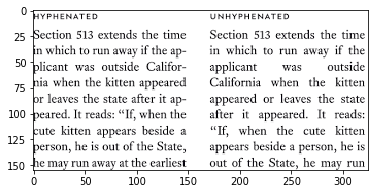

In [10]:
import matplotlib.pyplot as plt
plt.imshow(image)

In [11]:

# load the input image and construct an input blob for the image and resize image to
# fixed 300x300 pixels and then normalize it
image = image
(h, w) = image.shape[:2]
blob = cv2.dnn.blobFromImage(cv2.resize(image, (320, 320)), 1.0, (320, 320), (103.93, 116.77, 123.68))

In [12]:
blob

array([[[[151.07   , 151.07   , 151.07   , ..., 151.07   , 151.07   ,
          151.07   ],
         [151.07   , 151.07   , 151.07   , ..., 151.07   , 151.07   ,
          151.07   ],
         [151.07   , 151.07   , 151.07   , ..., 151.07   , 151.07   ,
          151.07   ],
         ...,
         [151.07   , 151.07   , 151.07   , ..., 151.07   , 151.07   ,
          151.07   ],
         [151.07   , 151.07   , 151.07   , ..., 151.07   , 151.07   ,
          151.07   ],
         [151.07   , 151.07   , 151.07   , ..., 151.07   , 151.07   ,
          151.07   ]],

        [[138.23001, 138.23001, 138.23001, ..., 138.23001, 138.23001,
          138.23001],
         [138.23001, 138.23001, 138.23001, ..., 138.23001, 138.23001,
          138.23001],
         [138.23001, 138.23001, 138.23001, ..., 138.23001, 138.23001,
          138.23001],
         ...,
         [138.23001, 138.23001, 138.23001, ..., 138.23001, 138.23001,
          138.23001],
         [138.23001, 138.23001, 138.23001, ..., 13

In [13]:

# pass the blob through the network and obtain the detections and
# predictions
print("[INFO] computing object detections...")
net.setInput(blob)
detections = net.forward()

[INFO] computing object detections...


In [14]:
#  loop over the detections
for i in range(0, detections.shape[2]):
    # extract the confidence (i.e., probability) associated with the
    # prediction
    confidence = detections[0, 0, i, 2]

    # filter out weak detections by ensuring the `confidence` is
    # greater than the minimum confidence
    if confidence > 0.5:
        # compute the (x, y)-coordinates of the bounding box for the
        # object
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")

        # draw the bounding box of the face along with the associated
        # probability
        text = "{:.2f}%".format(confidence * 100)
        y = startY - 10 if startY - 10 > 10 else startY + 10
        cv2.rectangle(image, (startX, startY), (endX, endY),
                      (0, 0, 255), 2)
        cv2.putText(image, text, (startX, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)

In [ ]:
# show the output image
cv2.imshow("Output", image)
cv2.waitKey(0)